# Árvores de decisão

Uma àrvore de decisão consiste em dividir um conjunto de dados determinado de maneira recursiva, para resolver um problema de decisão. Desta forma, um problema maior é dividido em diversos outros problemas mais simples.

**Exemplo**

- Considere a seguinte base de dados ( base adaptada de (FACELLI 2011, p. 88)). A base consiste em um registro das condições do tempo em dias de jogos de tênis.
- A ideia de utilização do algoritmo é predizer se haverá ou não jogo de tênis em determinado dia, com base nas condições climáticas.

|Tempo		|Temperatura|Umidade|Vento	|Jogo|
|-----------|-----------|-------|-------|----|
|Chuvoso	|22			|91		|Sim	|Não |
|Ensolarado	|21			|72		|Não	|Sim |
|Ensolarado	|27			|90		|Sim	|Não |
|Nublado	|28			|86		|Não	|Sim |
|Chuvoso	|21			|96		|Não	|Sim |
|Chuvoso	|18			|70		|Sim	|Não |
|Nublado	|18			|65		|Sim	|Sim |
|Nublado	|22			|90		|Sim	|Sim |
|Ensolarado	|24			|70		|Sim	|Sim |
|Chuvoso	|20			|80		|Não	|Sim |
|Nublado	|27			|75		|Não	|Sim |
|Ensolarado	|29			|85		|Não	|Não |
|Ensolarado	|22			|95		|Não	|Não |
|Chuvoso	|24			|80		|Não	|Sim |

- Como exemplo, tentaremos responder à seguinte pergunta:
    - Se a previsão do tempo de amanhã indicar que o dia será ensolarado, terá vento, umidade será de 68 e a temperatura estimada será de 26, terá jogo?
- Faremos divisões sucessivas na base de dados, com bases em observações. 

Para gerar um Dataframe Pandas com esses dados:
```python
import pandas as pd
dJogo = {
'Tempo'       : ['Chuvoso', 'Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso',
                 'Chuvoso', 'Nublado', 'Nublado', 'Ensolarado', 'Chuvoso',
                 'Nublado', 'Ensolarado',
                 'Ensolarado', 'Chuvoso'],
'Temperatura' : [22, 21, 27, 28, 21, 
                 18, 18, 22, 24, 20, 
                 27, 29, 22, 24],
'Umidade'     : [91,72,90,86,96,
                 70,65,90,70,80,
                 75,85,95,80],
'Vento'       : ['Sim','Não','Sim','Não','Não',
                 'Sim','Sim','Sim','Sim','Não',
                 'Não','Não','Não','Não'],
'Jogo'        : ['Não','Sim','Não','Sim','Sim',
                 'Não','Sim','Sim','Sim','Sim',
                 'Sim','Não','Não','Sim']
}
dfTenis = pd.DataFrame(dJogo)
```

**Atividade**
- Crie um Dataframe Pandas com a base de dados do exemplo.

As divisões que adotaremos são meramente didáticas, para explicar o funcionamento das árvores de decisão.

Nos próximos passos, tentaremos dividir recursivamente o problema. Tentaremos criar um algoritmo específico para essa base, com base nas divisões realizadas.

Inicialmente, vamos realizar uma divisão da base observando a variável `Tempo`. Dividiremos em duas partes, onde o tempo é `Nublado` ou não `Nublado`.

```python
df = dfTenis
condicao = df['Tempo']=='Nublado'
TempoNubladoSim, TempoNubladoNao =  df[condicao] , df[~condicao]
```

Observando a base caso tempo seja nublado:  
```python
TempoNubladoSim
```

Nas situações em que `Tempo == Nublado`, a variável `Jogo` tem valor `Sim`. Com isso, começamos a construir nosso algoritmo:


```
- O tempo está nublado?
    Sim: 
        Tem jogo.
    Não:
        ...
```

Observando o caso contrário, a variável `Jogo` não é homogênea.
```python
TempoNubladoNao
```

A partir da base onde o tempo não está nublado, vamos dividí-la novamente. Neste ponto pela temperatura, em 22.

```python
df = TempoNubladoNao
condicao = df['Temperatura']<22
TempoNubladoNao_TempMenorq22 = df[condicao]
TempoNubladoNao_TempMaiori22 = df[~condicao]
```

O conteúdo da variável `Jogo` ainda não é homogêneo. Porém, vamos atualizar nosso algoritmo:


```
- O tempo está nublado?
    Sim: 
        Tem jogo!
    Não:
        A Temperatura é menor que 22?
        Sim:
            ...
        Não:
            ...
```

Continuando as divisões e agora observando onde a temperatura é maior que 22. Realizaremos uma divisão considerando a variável `Vento`.

```python
df = TempoNubladoNao_TempMenorq22
condicao = df['Vento'] == 'Sim'
TempoNubladoNao_TempMenorq22_VentoSim = df[condicao]
TempoNubladoNao_TempMenorq22_VentoNao = df[~condicao]
```

Observando as bases resultantes:
```python
TempoNubladoNao_TempMenorq22_VentoSim
```

e 
```python
TempoNubladoNao_TempMenorq22_VentoNao
```

Atualizando o algoritmo:


```
- O tempo está nublado?
    Sim: 
        Tem jogo!
    Não:
        A Temperatura é menor que 22?
        Sim:
            Tem vento?
                Sim:
                    Não tem jogo.
                Não:
                    Tem jogo!
        Não:
            ...
```

Ainda falta observar quando a temperatura é maior ou igual a 22. Neste caso, dividiremos de acordo com a variável `umidade`, com valores abaixo e acima de 85.

```python
df = TempoNubladoNao_TempMaiori22
condicao = df['Umidade'] < 85
TempoNubladoNao_TempMaiori22_UmidadeMenorq85 = df[condicao]
TempoNubladoNao_TempMaiori22_UmidadeMaiori85 = df[~condicao]
```

Observando as bases resultantes
```python
TempoNubladoNao_TempMaiori22_UmidadeMenorq85
```

e 
```python
TempoNubladoNao_TempMaiori22_UmidadeMaiori85
```

Agora, possuimos divisões da base original em que nelas o valor da variável `Jogo` é homogêneo. Atualizando o algoritmo temos:


```
O tempo está nublado?
    Sim: 
        Tem jogo.
    Não:
        A Temperatura é menor que 22?
        Sim:
            Tem vento?
                Sim:
                    Não tem jogo.
                Não:
                    Tem jogo.
        Não:
            A umidade é menor que 85?
                Sim:
                    Tem jogo.
                Não:
                    Não tem jogo.
```
<!-- 

```
O tempo está nublado? (1)
    Sim: 
        Tem jogo! (rA)
    Não:
        A Temperatura é menor que 22? (2)
        Sim:
            Tem vento? (3)
                Sim:
                    Não tem jogo. (rB)
                Não:
                    Tem jogo! (rC)
        Não:
            A umidade é menor que 85? (4)
                Sim:
                    Tem jogo! (rD)
                Não:
                    Não tem jogo. (rE)
```
 -->

- Agora com o algoritmo, tentaremos responder à pergunta inicial:
    - Se a previsão do tempo de amanhã indicar que o dia:
        - será ensolarado, 
        - terá vento, 
        - umidade será de 68 e a
        - temperatura estimada será de 26.
        - Então, terá jogo?        

Podemos visualizar o algoritmo gerado com as decisões utilizando uma árvore.

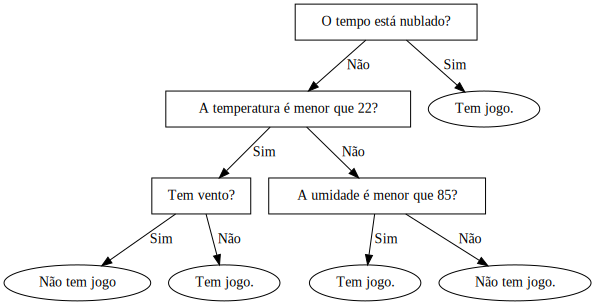

In [4]:
##Este código serve apenas para construir uma árvore com o algoritmo exemplo que criamos
from graphviz import Digraph
dot = Digraph(comment='Árvore de decisão')
dot.node('1','O tempo está nublado?', shape='box')
dot.node('2','A temperatura é menor que 22?', shape='box')
dot.node('3','Tem vento?', shape='box')
dot.node('4','A umidade é menor que 85?', shape='box')

dot.node('rA','Tem jogo.')
dot.node('rB','Não tem jogo')
dot.node('rC','Tem jogo.')
dot.node('rD','Tem jogo.')
dot.node('rE','Não tem jogo.')

dot.edge('1','rA',label='Sim')
dot.edge('1','2',label='Não')
dot.edge('2','3',label='Sim')
dot.edge('3','rB',label='Sim')
dot.edge('3','rC',label='Não')
dot.edge('2','4',label='Não')
dot.edge('4','rD',label='Sim')
dot.edge('4','rE',label='Não')

dot
# dot.render(view=True)

Por isso, esta estratégia é chamada de **Árvores de decisão**.

Consideraremos a variável `jogo` como variável **alvo** (*target*), é ela que desejamos obter a partir das demais variáveis.

## Variáveis *dummy*

Para as variáveis independentes qualitativas, é necessário passá-las a um formato binário. Neste formato, cada valor da variável original gera uma coluna com valores binários indicando a presença ou ausência daquele valor.

**Exemplo**
- Considere a variável `Tempo`. Convertendo-a para *dummy*:

<table>
    <tr><th>Variável original </th><th>Variável com valores dummy</th></tr>
<tr><td>

|Tempo		|
|-----------|
|Chuvoso	|
|Ensolarado	|
|Ensolarado	|
|Nublado	|
|Chuvoso	|
|Chuvoso	|
|Nublado	|
|Nublado	|
|Ensolarado	|
|Chuvoso	|
|Nublado	|
|Ensolarado	|
|Ensolarado	|
|Chuvoso	|

</td><td>

|Tempo_Chuvoso|Tempo_Ensolarado|Tempo_Nublado|
|--|--|--|
1|0|0
0|1|0
0|1|0
0|0|1
1|0|0
1|0|0
0|0|1
0|0|1
0|1|0
1|0|0
0|0|1
0|1|0
0|1|0
1|0|0
    

</td></tr> </table>

A biblioteca Pandas possui o método `.get_dummies()` para converter Series e Dataframes para o formato *dummy*. 

**Exemplo**
```python
pd.get_dummies(dfTenis['Tempo'])
```

É possível converter várias variáveis de uma única vez.

**Exemplo**  
- Convertendo todas as variáveis qualitativas da base de uma única vez
```python
quali = ['Tempo', 'Vento']
pd.get_dummies(dfTenis[quali])
```

## Preparação da base

Convém criar uma base contendo apenas as variáveis *dummy* e as quantitativas, que servirá de entrada para a criação da árvore de decisão.

**Exemplo**  
```python
quali = ['Tempo', 'Vento'] #Variáveis qualitativas
quant = ['Temperatura', 'Umidade'] #Variáveis quantitativas

dfQualiDummies = pd.get_dummies(dfTenis[quali]) #Dataframe com qualitativas dummy
dfQuant = dfTenis[quant] #Dataframe com quantitativas

dfWork = pd.concat([dfQualiDummies, dfQuant ], axis=1 ) #Dataframe com quali dummy e quant
dfWork
```

Convém separar a variável alvo também.

```python
target = dfTenis['Jogo']
```

## Criação e visualização

Para criar a árvore utilizaremos a biblioteca `sklearn`. Na biblioteca, utilizamos a classe `tree`.

**Atividade**  

```python
from sklearn import tree
```

Com base no tipo de variável que se tem como variável alvo, deve-se escolher o tipo de árvore, de classificação ou regressão.

**Exemplo**  
```python
arv = tree.DecisionTreeClassifier() #árvore de classificação
```
ou

```python
arv = tree.DecisionTreeRegressor() #árvore de regressão
```

Após alocado o objeto responsável pela árvore, é necessário criar a árvore. Para isso, utilizaremos o método `.fit()`, passando como parâmetros a base com as variáveis *dummy* e quantitativas, e a variável alvo.

**Exemplo**  
```python
arv.fit(dfWork, target)
```

Para visualizar a árvore, pode-se utilizar a biblioteca `graphviz`.

**Exemplo**  
```python
import graphviz
dot_data = tree.export_graphviz(arv, 
                      feature_names=dfWork.columns,  #variáveis
                      class_names=arv.classes_,      #valores dos resultados
                      out_file=None,                 #Arquivo de saída
                      #configurações dos nós
                      filled=True, rounded=True,     
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
```

### Utilizando a árvore criada

Para fazer uma busca por resultados na árvore pode-se utilizar o método `.predict()`

**Exemplo**
```python					
vals = [0,  #Tempo_Chuvoso
        1,  #Tempo_Ensolarado
        0,  #Tempo_Nublado
        1,  #Vento_Não
        0,  #Vento_Sim
        22, #Temperatura
        80  #Umidade
       ]
res = arv.predict([vals])
```

**Atividade**  
- Execute o exemplo

## Resumo

Para criar e utilizar uma árvore de decisão:

1. Defina qual será a variável alvo
    1. Salve a variável alvo separadamente da base
1. Observe quais são as variáveis qualitativas
    1. Converta as variáveis qualitativas em variáveis *dummy*
1. Observe quais são as variáveis quantitativas
1. Coloque as variáveis *dummy* e as quantitativas em uma base de trabalho
1. Observe a variável alvo e gere a árvore
    - Caso seja qualitativa, será uma árvore de **decisão**
    - Caso seja quantitativa, será uma árvore de **regressão**
1. Gere a árvore
1. Observe os resultados, fazendo buscas na árvore

**Exemplo**  

```python
alvo = 'Jogo' #variável alvo
quali = ['Tempo', 'Vento'] #Variáveis qualitativas
quant = ['Temperatura', 'Umidade'] #Variáveis quantitativas



target = dfTenis[alvo] #Separa a variável alvo
dfQualiDummies = pd.get_dummies(dfTenis[quali]) #Dataframe com qualitativas dummy
dfQuant = dfTenis[quant] #Dataframe com quantitativas
dfWork = pd.concat([dfQualiDummies, dfQuant], axis=1) #Dataframe com todas variáveis

arv = tree.DecisionTreeClassifier() #árvore de decisão
# arv = tree.DecisionTreeRegressor()  #árvore de regressão

#Gere a árvore
arv.fit(dfWork, target) #cria a árvore

#Visualize a árvore (passo não obrigatório)
# import graphviz
# dot_data = tree.export_graphviz(arv, 
#                       feature_names=dfWork.columns,  #variáveis
#                       class_names=arv.classes_,      #valores dos resultados
#                       out_file=None,                 #Arquivo de saída
#                       #configurações dos nós
#                       filled=True, rounded=True,     
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 
```

De maneira concisa:

```python
#Variáveis
alvo = 'Jogo' #variável alvo
quali = ['Tempo', 'Vento'] #Variáveis qualitativas
quant = ['Temperatura', 'Umidade'] #Variáveis quantitativas
base = dfTenis

#Árvore
arv = tree.DecisionTreeClassifier() #árvore de decisão
# arv = tree.DecisionTreeRegressor()  #árvore de regressão
arv.fit(pd.concat([pd.get_dummies(base[quali]), base[quant]], axis=1), base[alvo]) #cria a árvore

#Teste
```

## Referências
FACELI, K.; LORENA, A.C.; GAMA, J.; CARVALHO, A.C.P.L.F.  Inteligência Artificial: Uma abordagem de aprendizado de máquina. Grupo Gen-LTC, 2011.  

[CHIAVEGATTO, A.F. Algoritmos de machine learning: support vector machines, random forests e gradient boosted trees. Notas de aula do curso  Inteligência Artificial em saúde: o uso de machine learning. Universidade de São Paulo.](https://www.youtube.com/watch?v=xSna88sBWHU&t=23s)  

[LOPES, H.F.; MARQUES, P.C. Árvores de Classificação e Regressão. Insper, 2017.](http://hedibert.org/wp-content/uploads/2018/06/CART.pdf)  

**Outros materiais**  

[ANALYTICS VIDHYA. Tree Based Algorithms: A Complete Tutorial from Scratch](https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/)  
[LANGFORD, R. The Dummy’s Guide to Creating Dummy Variables. Towards Data Science, 2017.](https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40)  
[HIRO. Introduction to Graphviz in Jupyter Notebook.](https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/)  
[Terrence, P.; Grover, P. How to visualize decision trees. Explained.ai.](https://explained.ai/decision-tree-viz/)  